In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

2024-02-09 14:41:23.755808: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 14:41:23.793043: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-09 14:41:23.793082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-09 14:41:23.794256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-09 14:41:23.800121: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-09 14:41:23.800883: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
df1= pd.read_csv('datasets/Normal_data.csv')
df2=pd.read_csv('datasets/metasploitable-2.csv')

In [3]:
df1

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68419,185.127.17.56-192.168.20.133-443-36100-6,192.168.20.133,36100,185.127.17.56,443,6,5/2/2020 19:20,1895,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68420,192.168.20.133-192.168.20.2-53032-53-17,192.168.20.133,53032,192.168.20.2,53,17,5/2/2020 19:21,3842,1,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68421,192.168.20.133-192.168.20.2-39285-53-17,192.168.20.133,39285,192.168.20.2,53,17,5/2/2020 19:19,3731,1,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68422,192.168.20.133-192.168.20.2-49895-53-17,192.168.20.133,49895,192.168.20.2,53,17,5/2/2020 19:18,20591,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [4]:
df2

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10/1/2020 5:02,269709,4,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
1,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/1/2020 5:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
2,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/1/2020 5:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
3,192.168.3.130-200.175.2.130-8180-38745-6,200.175.2.130,38745,192.168.3.130,8180,6,10/1/2020 1:39,9556,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BFA
4,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/1/2020 1:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136738,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136739,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136740,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136741,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R


In [5]:
df= df1.merge(df2, how='outer')

In [6]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205163,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205164,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205165,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R


In [7]:
print(df['Label'].value_counts())

Label
DDoS      73529
Normal    68424
Probe     61757
DoS        1145
BFA         295
U2R          17
Name: count, dtype: int64


In [8]:
#Putting underscores in place of spaces in the column names
cols = df.columns
cols = cols.map(lambda x: x.replace(' ', '_') )
df.columns = cols
print(df.head())

                                    Flow_ID          Src_IP  Src_Port  \
0  185.127.17.56-192.168.20.133-443-53648-6   185.127.17.56       443   
1  185.127.17.56-192.168.20.133-443-53650-6  192.168.20.133     53650   
2    192.168.20.133-192.168.20.2-35108-53-6  192.168.20.133     35108   
3    192.168.20.133-192.168.20.2-35108-53-6    192.168.20.2        53   
4  154.59.122.74-192.168.20.133-443-60900-6  192.168.20.133     60900   

           Dst_IP  Dst_Port  Protocol       Timestamp  Flow_Duration  \
0  192.168.20.133     53648         6  5/2/2020 13:58         245230   
1   185.127.17.56       443         6  5/2/2020 13:58        1605449   
2    192.168.20.2        53         6  5/2/2020 13:58          53078   
3  192.168.20.133     35108         6  5/2/2020 13:58           6975   
4   154.59.122.74       443         6  5/2/2020 13:58         190141   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Fwd_Seg_Size_Min  Active_Mean  Active_Std  \
0            44            40  ...             

In [9]:
#replace infinit number if any
df=df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

#drop null
df.dropna(how = 'all')

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205163,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205164,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R
205165,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,U2R


In [10]:
print('Data type of each column of Dataframe :')
df.info(verbose=True)

Data type of each column of Dataframe :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205167 entries, 0 to 205166
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            205167 non-null  object 
 1   Src_IP             205167 non-null  object 
 2   Src_Port           205167 non-null  int64  
 3   Dst_IP             205167 non-null  object 
 4   Dst_Port           205167 non-null  int64  
 5   Protocol           205167 non-null  int64  
 6   Timestamp          205167 non-null  object 
 7   Flow_Duration      205167 non-null  int64  
 8   Tot_Fwd_Pkts       205167 non-null  int64  
 9   Tot_Bwd_Pkts       205167 non-null  int64  
 10  TotLen_Fwd_Pkts    205167 non-null  float64
 11  TotLen_Bwd_Pkts    205167 non-null  float64
 12  Fwd_Pkt_Len_Max    205167 non-null  int64  
 13  Fwd_Pkt_Len_Min    205167 non-null  int64  
 14  Fwd_Pkt_Len_Mean   205167 non-null  float64
 15  Fwd_Pkt_Len

In [11]:
df = df.drop(columns=['Timestamp', 'Flow_ID', 'Src_IP', 'Dst_IP'])
print('Timestamp, ', 'Flow_ID, ', 'Src_IP, ', 'Dst_IP, ', "columns are dropped")

Timestamp,  Flow_ID,  Src_IP,  Dst_IP,  columns are dropped


In [12]:
print(df['Label'].value_counts())

Label
DDoS      73529
Normal    68424
Probe     61757
DoS        1145
BFA         295
U2R          17
Name: count, dtype: int64


In [13]:
# importing required libraries for normalizing data
from sklearn import preprocessing

In [14]:
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns

In [15]:
numeric_col

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt', 'Down/Up_Ratio', 'Pkt_Size_Avg',
       

In [16]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [17]:
# data before normalization
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,443,53648,6,245230,44,40,124937.0,1071.0,9100,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,53650,443,6,1605449,107,149,1071.0,439537.0,517,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,35108,53,6,53078,5,5,66.0,758.0,66,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,53,35108,6,6975,1,1,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,60900,443,6,190141,13,16,780.0,11085.0,427,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [18]:
# calling the normalization() function
df = normalization(df.copy(),numeric_col)

In [19]:
# data after normalization
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal


In [20]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_label = pd.DataFrame(df.Label.map(lambda x:'Normal' if x=='Normal' else 'abnormal'))

In [21]:
print(bin_label['Label'].value_counts())

Label
abnormal    136743
Normal       68424
Name: count, dtype: int64


In [22]:
# creating a dataframe with binary labels (normal,abnormal)
bin_data = df.copy()
bin_data['Label'] = bin_label

In [23]:
bin_data

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,1.088268,-0.346626,0.057304,-0.376300,-0.039131,-0.038554,-0.012473,-0.030972,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,abnormal
205163,1.088312,-0.346626,0.057304,-0.376497,0.022117,-0.009242,-0.010942,-0.030972,-0.124497,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,abnormal
205164,1.214003,-0.581893,0.057304,-0.327503,0.022117,-0.023898,-0.011808,-0.030888,-0.138674,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,abnormal
205165,1.088268,-0.346626,0.057304,-0.376338,-0.039131,-0.038554,-0.012473,-0.030972,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,abnormal


In [24]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label

In [25]:
le1.classes_

array(['Normal', 'abnormal'], dtype=object)

In [26]:
np.save("le1_classes_with_balanced.npy",le1.classes_,allow_pickle=True)

In [27]:
# dataset with binary labels and label encoded column
bin_data.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,intrusion
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,-0.089296,-0.078661,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,Normal,0


In [28]:
# one-hot-encoding attack label
bin_data = pd.get_dummies(bin_data,columns=['Label'],prefix="",prefix_sep="")
bin_data['Label'] = bin_label
bin_data

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,intrusion,Normal,abnormal,Label
0,-0.759847,2.342361,0.057304,-0.377365,0.603976,0.232578,1.373246,-0.028611,10.576382,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,True,False,Normal
1,1.608301,-0.565280,0.057304,-0.325485,1.568637,1.031317,-0.000594,0.959040,0.436655,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,True,False,Normal
2,0.783030,-0.586593,0.057304,-0.384693,0.006805,-0.023898,-0.011741,-0.029316,-0.096144,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,True,False,Normal
3,-0.777205,1.329155,0.057304,-0.386452,-0.054443,-0.053210,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,True,False,Normal
4,1.930986,-0.565280,0.057304,-0.379466,0.129302,0.056708,-0.003822,-0.006054,0.330332,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,0,True,False,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205162,1.088268,-0.346626,0.057304,-0.376300,-0.039131,-0.038554,-0.012473,-0.030972,-0.174115,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,False,True,abnormal
205163,1.088312,-0.346626,0.057304,-0.376497,0.022117,-0.009242,-0.010942,-0.030972,-0.124497,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,False,True,abnormal
205164,1.214003,-0.581893,0.057304,-0.327503,0.022117,-0.023898,-0.011808,-0.030888,-0.138674,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,False,True,abnormal
205165,1.088268,-0.346626,0.057304,-0.376338,-0.039131,-0.038554,-0.012473,-0.030972,-0.174115,-0.184907,...,-0.10082,-0.059353,-0.368142,-0.102819,-0.372425,-0.36081,1,False,True,abnormal


In [29]:
#DATA BALANCE

majority_class = bin_data[bin_data['Label'] == 'abnormal']
minority_class = bin_data[bin_data['Label'] == 'Normal']

# Count the number of rows in each class
majority_count= bin_data[bin_data['Label'] == 'abnormal'].shape[0]
minority_count = bin_data[bin_data['Label'] == 'Normal'].shape[0]

# Randomly sample the attack rows to reduce their count
df_attack = bin_data[bin_data['Label'] == 'abnormal'].sample(n=minority_count, random_state=42)

# Combine the DDoS and sampled benign rows into a new dataframe
df_reduced = pd.concat([bin_data[bin_data['Label'] == 'Normal'], df_attack])

# Shuffle the rows in the new dataframe
df_reduced = df_reduced.sample(frac=1, random_state=42)

balanced_data = df_reduced
print(balanced_data['Label'].value_counts())

Label
Normal      68424
abnormal    68424
Name: count, dtype: int64


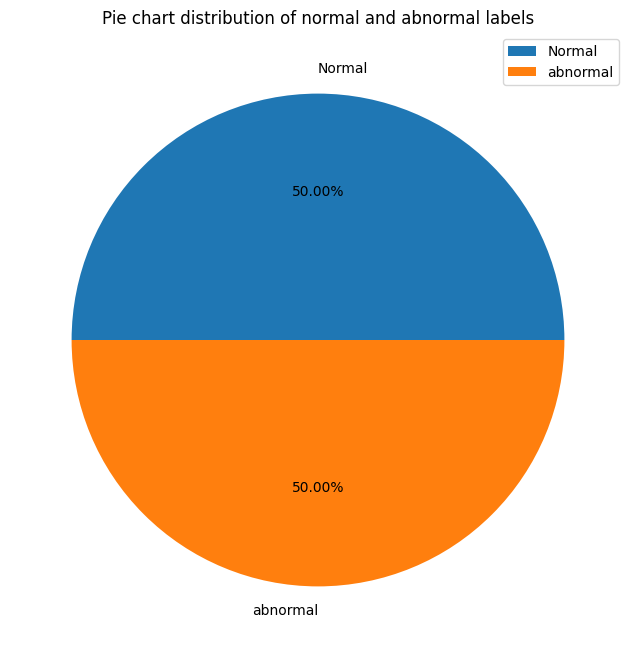

In [31]:
# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(balanced_data.Label.value_counts(),labels=balanced_data.Label.unique(),autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.savefig('Pie_chart_binary.png')
plt.show()

In [35]:
balanced_data

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,intrusion,Normal,abnormal,Label
29005,0.872670,-0.565280,0.057304,1.132746,0.527416,0.247234,0.137582,0.114973,1.256528,-0.184907,...,2.754202,6.647982,0.149395,-0.102819,0.136824,0.160380,0,True,False,Normal
40798,1.431248,-0.565280,0.057304,-0.386660,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,0,True,False,Normal
36090,1.265588,-0.565280,0.057304,-0.185111,0.022117,-0.023898,-0.005829,-0.030693,0.436655,-0.184907,...,-0.069037,0.015315,-0.089872,-0.102819,-0.098611,-0.080575,0,True,False,Normal
155876,1.093653,-0.071355,0.057304,-0.386717,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,1,False,True,abnormal
107917,-0.779564,-0.589490,-0.990629,-0.386717,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,1,False,True,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168378,-0.776003,1.822806,0.057304,1.975367,-0.023819,-0.009242,-0.012140,-0.030956,-0.138674,-0.184907,...,-0.098506,-0.053916,2.919532,-0.102819,2.862595,2.950067,1,False,True,abnormal
178261,-0.776003,1.260241,0.057304,1.972212,-0.023819,-0.009242,-0.012140,-0.030956,-0.138674,-0.184907,...,-0.098198,-0.053194,2.914220,-0.102819,2.857369,2.944718,1,False,True,abnormal
194434,-0.776003,1.594042,0.057304,1.983224,-0.023819,-0.009242,-0.012140,-0.030956,-0.138674,-0.184907,...,-0.099870,-0.057120,2.924843,-0.102819,2.867821,2.955415,1,False,True,abnormal
150050,0.822331,-0.073487,0.057304,-0.386717,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,1,False,True,abnormal


In [34]:
# creating a dataframe with only numeric attributes of binary class dataset and encoded label attribute
numeric_bin = balanced_data[numeric_col]
numeric_bin['intrusion'] = balanced_data['intrusion']

/tmp/ipykernel_33948/80482647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_bin['intrusion'] = balanced_data['intrusion']


In [36]:
numeric_bin

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,intrusion
29005,0.872670,-0.565280,0.057304,1.132746,0.527416,0.247234,0.137582,0.114973,1.256528,-0.184907,...,0.0,4.988185,-0.078661,2.754202,6.647982,0.149395,-0.102819,0.136824,0.160380,0
40798,1.431248,-0.565280,0.057304,-0.386660,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,0
36090,1.265588,-0.565280,0.057304,-0.185111,0.022117,-0.023898,-0.005829,-0.030693,0.436655,-0.184907,...,0.0,-0.032773,-0.078661,-0.069037,0.015315,-0.089872,-0.102819,-0.098611,-0.080575,0
155876,1.093653,-0.071355,0.057304,-0.386717,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,1
107917,-0.779564,-0.589490,-0.990629,-0.386717,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168378,-0.776003,1.822806,0.057304,1.975367,-0.023819,-0.009242,-0.012140,-0.030956,-0.138674,-0.184907,...,0.0,-0.085181,-0.078661,-0.098506,-0.053916,2.919532,-0.102819,2.862595,2.950067,1
178261,-0.776003,1.260241,0.057304,1.972212,-0.023819,-0.009242,-0.012140,-0.030956,-0.138674,-0.184907,...,0.0,-0.084634,-0.078661,-0.098198,-0.053194,2.914220,-0.102819,2.857369,2.944718,1
194434,-0.776003,1.594042,0.057304,1.983224,-0.023819,-0.009242,-0.012140,-0.030956,-0.138674,-0.184907,...,0.0,-0.087606,-0.078661,-0.099870,-0.057120,2.924843,-0.102819,2.867821,2.955415,1
150050,0.822331,-0.073487,0.057304,-0.386717,-0.069755,-0.045882,-0.012473,-0.031024,-0.174115,-0.184907,...,0.0,-0.089296,-0.078661,-0.100820,-0.059353,-0.368142,-0.102819,-0.372425,-0.360810,1


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

In [37]:
numeric = numeric_bin.drop(['intrusion'],axis=1)
y= numeric_bin['intrusion']

In [41]:

rfc = RandomForestClassifier()

rfe = RFE(rfc,n_features_to_select=10)
rfe = rfe.fit(numeric,y)

feature_map = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(),numeric.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['Fwd_Pkt_Len_Mean',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Max',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'Pkt_Size_Avg',
 'Fwd_Seg_Size_Avg',
 'Init_Bwd_Win_Byts']

In [42]:
numeric_bin=numeric_bin[selected_features]

In [43]:
numeric_bin

,Fwd_Pkt_Len_Mean,Bwd_IAT_Tot,Bwd_IAT_Max,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts
29005,0.862912,1.164843,0.149819,1.483322,2.858391,2.085865,0.217784,2.697656,0.862912,2.420659
40798,-0.154458,-0.380121,-0.374572,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,2.420615
36090,0.138330,-0.378386,-0.372989,-0.026283,-0.077528,0.016422,-0.049965,-0.086238,0.138330,2.420659
155876,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093
107917,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418137
...,...,...,...,...,...,...,...,...,...,...
168378,-0.125131,2.022758,2.871826,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309
178261,-0.125131,2.018876,2.866581,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309
194434,-0.125131,2.030522,2.877070,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309
150050,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093


In [45]:
#then joining encoded, one-hot-encoded, and original attack label attribute
balanced_data = numeric_bin.join(bin_data[['intrusion','abnormal','Normal','Label']])

In [47]:
# saving final dataset to disk
balanced_data.to_csv("balanced_data_try.csv")
# final dataset for binary classification
balanced_data

,Fwd_Pkt_Len_Mean,Bwd_IAT_Tot,Bwd_IAT_Max,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts,intrusion,abnormal,Normal,Label
29005,0.862912,1.164843,0.149819,1.483322,2.858391,2.085865,0.217784,2.697656,0.862912,2.420659,0,False,True,Normal
40798,-0.154458,-0.380121,-0.374572,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,2.420615,0,False,True,Normal
36090,0.138330,-0.378386,-0.372989,-0.026283,-0.077528,0.016422,-0.049965,-0.086238,0.138330,2.420659,0,False,True,Normal
155876,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093,1,True,False,abnormal
107917,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418137,1,True,False,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168378,-0.125131,2.022758,2.871826,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309,1,True,False,abnormal
178261,-0.125131,2.018876,2.866581,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309,1,True,False,abnormal
194434,-0.125131,2.030522,2.877070,-0.156219,-0.263929,-0.213080,-0.053086,-0.277584,-0.125131,-0.415309,1,True,False,abnormal
150050,-0.154458,-0.380180,-0.374651,-0.164223,-0.281857,-0.233345,-0.053107,-0.296156,-0.154458,-0.418093,1,True,False,abnormal
